# Download the data set from github link


In [ ]:
# Download Bitcoin historical data from GitHub 
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2021-12-21 16:16:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2021-12-21 16:16:05 (6.12 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



# Iporting dta using Python CSV library

Importing data with pandas is what we are all femiliar with. This time let us try importing data using Python's CSV library

In [ ]:
# import dependencies

import csv
from datetime import datetime

In [ ]:
# Import data

# Create empty list to hold the selected data from the `csv` file
timesteps = []
btc_price = []

# normal python file handling syntax and CSV reader
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as fh: # Normal python file reader syntax
  csv_reader = csv.reader(fh, delimiter = ',') # CSV Reader object - a line Iterator like any other python file reader
  next(csv_reader) # Need to skip the fist line of the file as it contains column names
  for line in csv_reader:
    # timesteps.append(line[1]) # This will render a string for our date. which is not useful in data analysis and modeling
    # btc_price.append(line[2]) # Same is the problem here. so we need to change the data type
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d')) # we are parsing the dates and storing them.
    btc_price.append(float(line[2])) # Convert the values in float 

In [ ]:
print(f'The time steps Downloaded are:\n {timesteps[:5]}, \nBitcoin price Downloaded are : \n{btc_price[:5]}')

The time steps Downloaded are:
 [datetime.datetime(2013, 10, 1, 0, 0), datetime.datetime(2013, 10, 2, 0, 0), datetime.datetime(2013, 10, 3, 0, 0), datetime.datetime(2013, 10, 4, 0, 0), datetime.datetime(2013, 10, 5, 0, 0)], 
Bitcoin price Downloaded are : 
[123.65499, 125.455, 108.58483, 118.67466, 121.33866]


In [ ]:
# Import data

# Create empty list to hold the selected data from the `csv` file
timesteps = []
btc_price = []

# normal python file handling syntax and CSV reader
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as fh: # Normal python file reader syntax
  csv_reader = csv.reader(fh, delimiter = ',') # CSV Reader object - a line Iterator like any other python file reader
  next(csv_reader) # Need to skip the fist line of the file as it contains column names
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d')) # we are parsing the dates and storing them.
    btc_price.append(float(line[2])) # Convert the values in float 

In [ ]:
print(f'The time steps Downloaded are:\n {timesteps[:5]}, \
\n\nBitcoin price Downloaded are : \n{btc_price[:5]}')

The time steps Downloaded are:
 [datetime.datetime(2013, 10, 1, 0, 0), datetime.datetime(2013, 10, 2, 0, 0), datetime.datetime(2013, 10, 3, 0, 0), datetime.datetime(2013, 10, 4, 0, 0), datetime.datetime(2013, 10, 5, 0, 0)], 

Bitcoin price Downloaded are : 
[123.65499, 125.455, 108.58483, 118.67466, 121.33866]


Note that now we have a tupel with 5 values for each date parsed

looks like Year, Month, Day, Hour, Min are parse as independent values. 

This is great for granular analysis of the data.

Also note that we have two list object for `Date` and `Btc Price` each. we can retain them as it is or convert them into a data frame fo Series. 

Let's try to plot from list and see what happens.

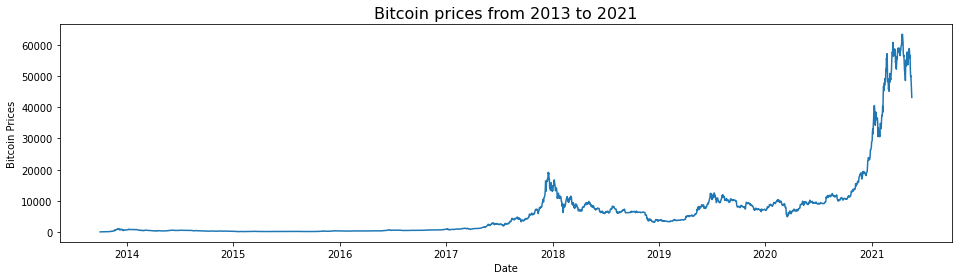

In [ ]:
# plotting from list objects
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (16,4))
plt.plot(timesteps, btc_price)
plt.title(f'Bitcoin prices from 2013 to 2021', fontsize = 16)
plt.xlabel('Date')
plt.ylabel('Bitcoin Prices')
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 
                             parse_dates = ['Date'],
                             index_col = ['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
bitcoin_prices = pd.DataFrame({ 'Price': btc_price}, index = timesteps )
bitcoin_prices.head()

,Price
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


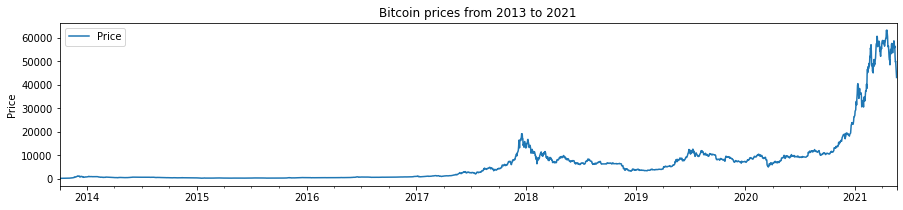

In [ ]:
bitcoin_prices.plot(figsize = (15,3))
plt.title('Bitcoin prices from 2013 to 2021')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.Price.to_numpy()

timesteps[:5], prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

In [ ]:
def plot_time_series(timesteps, values, format = '.', start = 0, end = None, label = None):
  """
  Plots timesteps (a series of points in time) against Values (a series of values across timesteps)

  Parameters
  ----------
  timesteps: array of timesteps (any date time series)
  values: array of values to be plotted against the timesteps
  format: style parameter - style of the plot
  start: start index of the timesteps and values to be plotted
  end: end index of the timesteps and values to be plotted
  label: label for the plot to be shown in the plot object
  """

  # plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label = label, )
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.grid(True)
  if label:
    plt.legend(fontsize = 14)
  # plt.show()

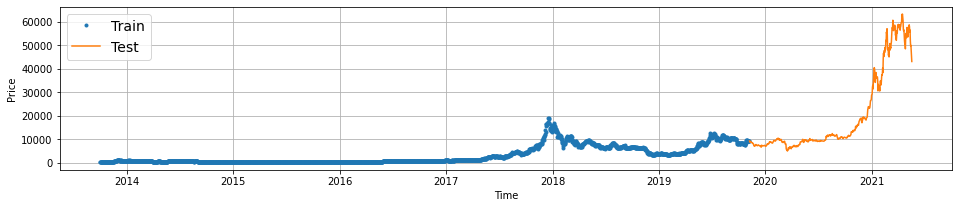

In [ ]:
plt.figure(figsize = (16,3))
plot_time_series(timesteps = X_train, values = y_train, label = 'Train' )
plot_time_series(timesteps = X_test, values = y_test, label = 'Test', format = '-')


In [ ]:
# Create a naive model
naive_forecast = y_test[:-1]

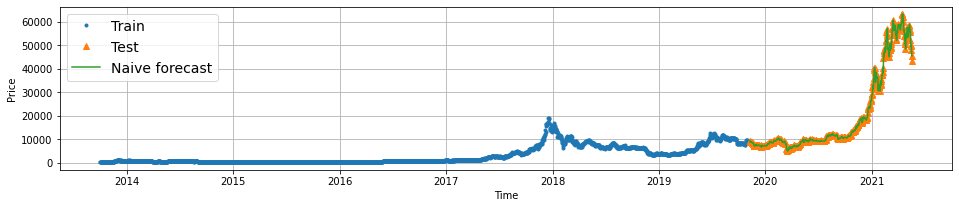

In [ ]:
# plot naive forecase
plt.figure(figsize = (16,3))
plot_time_series(timesteps = X_train, values = y_train, label = 'Train' )
plot_time_series(timesteps = X_test, values = y_test, label = 'Test', format = '^')
plot_time_series(timesteps=X_test[1:], values = naive_forecast, label = 'Naive forecast', format = "-")

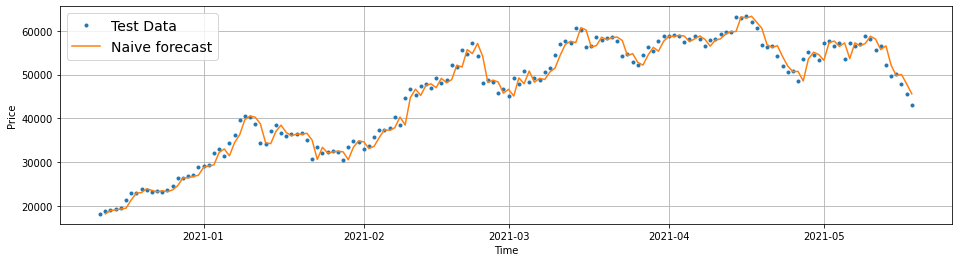

In [ ]:
# let us plot only test and forecase data and visualize by offsetting some time steps to enhance the picture
plt.figure(figsize = (16,4))
offset = 400
plot_time_series(timesteps = X_test, values = y_test, format = '.', label = 'Test Data', start = offset )
plot_time_series(timesteps = X_test[1:], values = naive_forecast, start = offset, label = 'Naive forecast', format = '-')

In [ ]:
import tensorflow as tf

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of the data)
  """
  mae = tf.reduce_mean(tf.abs(y_true, y_pred))

  # find MAE of naive forecast (no Seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  # print(mae / mae_naive_no_season)
  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluates the model performance accorss metrics such as MAE, MSE, RMSE, MAPE, MASE

  Returns:
  Returns a dictionary object of all the scores
  """
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate metrics
  metrics = {}
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred).numpy()
  metrics['mae'] = tf.keras.metrics.mean_absolute_error(y_true, y_pred).numpy()
  metrics['mse'] = mse
  metrics['rmse'] = tf.sqrt(mse).numpy()
  metrics['mape'] = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred).numpy()
  metrics['mase'] = mean_absolute_scaled_error(y_true, y_pred).numpy()

  return metrics

In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:], y_pred = naive_forecast)

naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 35.33124,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
y_test.shape, naive_forecast.dtype

((558,), dtype('float64'))

In [ ]:
tf.keras.metrics.mean_absolute_error(y_test[1:],naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=567.9802273457542>

In [ ]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluates the model performance accorss metrics such as MAE, MSE, RMSE, MAPE, MASE

  Returns:
  Returns a dictionary object of all the scores
  """
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  
  # Calculate metrics
  # metrics = {}
  # mse = tf.keras.metrics.mean_squared_error(y_true, y_pred).numpy()
  mae = tf.reduce_mean(tf.keras.metrics.mean_absolute_error(y_true, y_pred)).numpy()
  mse = tf.reduce_mean(tf.keras.metrics.mean_squared_error(y_true, y_pred)).numpy()
  rmse = tf.sqrt(mse).numpy()
  mape = tf.reduce_mean(tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)).numpy()
  mase = tf.reduce_mean(mean_absolute_scaled_error(y_true, y_pred)).numpy()

  return {'mae' : mae,
          'mse' : mse,
          'rmse' : rmse,
          'mape' : mape,
          'mase' : mase}

In [ ]:
evaluate_preds(y_test[1:], naive_forecast)

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 35.33124,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
tf.reduce_mean(y_test).numpy()

20056.632963737226

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_windows(x, horizon = 1):
  """
  Creates labels for the windowed dataset:
  input a sequence of numbers as window, the function will 
  split the last value of the window and set it as label for the window

  E.g. if hoizon=1 (default)
  input: [1,2,3,4,5,6,7] -> Output: ([1,2,3,4,5,6], [7])
  """

  return x[:,:-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(6)+1, axis = 0), horizon = 2)

print(f'Window: {tf.squeeze(test_window)} -> Label: {tf.squeeze(test_label)}')

Window: [1 2 3 4] -> Label: [5 6]


In [ ]:
def make_windows(x, window_size = 7, horizon  = 1):
  """
  Turns a 1D array into a 2D array of sequential windows of windowsize.
  """

  # create a window of specified window_size (add the horizon to the window for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis = 0)
  # print(f'window Step : {window_step}')

  # create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  # we have to minus 1 as our first window will be window step
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis = 0).T
  # print(f'window_indexes : {window_indexes}')

  # Index on the target array (time_series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # Get labeled windows
  windows, labels = get_labelled_windows(windowed_array, horizon = horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = 1)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(f'full_windows: {full_windows[i-3]} -> \n\n full_labels: {full_labels[i-3]}\n\n')

full_windows: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> 

 full_labels: [47885.62525472]


full_windows: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> 

 full_labels: [45604.61575361]


full_windows: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> 

 full_labels: [43144.47129086]




In [ ]:
def make_train_test_split(windows, labels, test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits
  """
  split_size = int(len(windows) * (1- test_split))
  train_windows = windows[ : split_size ]
  train_labels = labels[ : split_size ]
  test_windows = windows[ split_size : ]
  test_labels = labels[ split_size : ]

  return train_windows, test_windows, train_labels, test_labels 

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2224, 7), (556, 7), (2224, 1), (556, 1))

In [ ]:
# Check to see if same (account for horizon and window_size)
np.array_equal(np.squeeze(train_labels[:-HORIZON - 1]), y_train[ WINDOW_SIZE : ])

True

In [ ]:
y_train[WINDOW_SIZE :].shape #

(2222,)

In [ ]:
train_labels[:-HORIZON-1].shape

(2222, 1)

# Model Checkpointing

In [ ]:
import os

# create a function to implement a ModelCheckpoint callback with specific filename
def create_model_checkpoint(model_name, save_path = 'model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# construct the model
model_1 = tf.keras.Sequential([
                layers.Dense(128,  activation = 'relu'),
                layers.Dense(1, activation = 'linear')
], name = 'model_1_dense')

# compile model
model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# fit the model (we are not creating history object as we are saveing check point)
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 58ms/step - loss: 780.3469 - mae: 780.3469 - val_loss: 2279.5828 - val_mae: 2279.5828
Epoch 2/100
18/18 [==============================] - 1s 33ms/step - loss: 247.6765 - mae: 247.6765 - val_loss: 1005.9864 - val_mae: 1005.9864
Epoch 3/100
18/18 [==============================] - 1s 32ms/step - loss: 188.4107 - mae: 188.4107 - val_loss: 923.2859 - val_mae: 923.2859
Epoch 4/100
18/18 [==============================] - 1s 32ms/step - loss: 169.4334 - mae: 169.4334 - val_loss: 900.5932 - val_mae: 900.5932
Epoch 5/100
18/18 [==============================] - 1s 34ms/step - loss: 165.0899 - mae: 165.0899 - val_loss: 895.2405 - val_mae: 895.2405
Epoch 6/100
18/18 [==============================] - 1s 31ms/step - loss: 158.5206 - mae: 158.5206 - val_loss: 855.1868 - val_mae: 855.1868
Epoch 7/100
18/18 [==============================] - 1s 32ms/step - loss: 151.3568 - mae: 151.3568 - val_loss: 840.9290 - val_mae: 840.9290
Epoch 8/100
18/1

In [ ]:
model_1.summary() # note that input shape is inffered

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 662.5322 - mae: 662.5322


[662.5322265625, 662.5322265625]

In [ ]:
model_1 = tf.keras.models.load_model('model_experiment/model_1_dense')
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.5499 - mae: 568.5499


[568.5498657226562, 568.5498657226562]

# Makeing prediction on test data using function 

In [ ]:
def make_preds(model, test_data):
  """
  Uses the model to make predictions on test data:

  parameters
  ----------
  model: Any model trained and currently active
  test_data : windowed test data (same_kind of data, the model was trained on)

  Returns: array of model predictions on the test data
  """

  forecast = model.predict(test_data)
  return tf.squeeze(forecast) # returns 1D array of predictions

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10], model_1_preds.shape, len(test_windows)

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8874.493, 8789.944, 9040.986, 8804.829, 8741.21 , 8749.835,
        8705.865, 8513.171, 8478.415, 8536.302], dtype=float32)>,
 TensorShape([556]),
 556)

In [ ]:
# Evaluate / calculate metrics for model_1

model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 35.30375,
 'mse': 1172587.6,
 'rmse': 1082.8608}

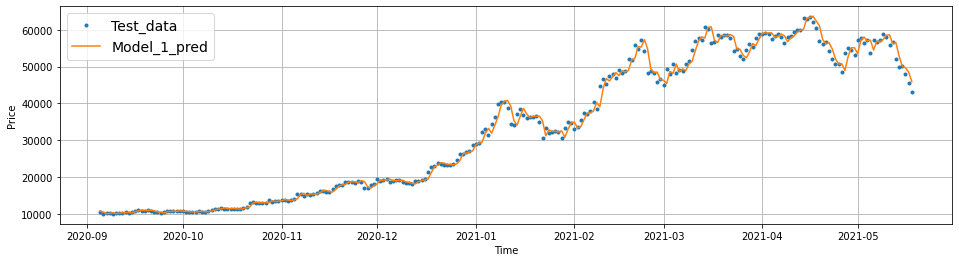

In [ ]:
offset = 300
plt.figure(figsize = (16,4))
plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = 'Test_data')
plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label = 'Model_1_pred')

# Model 2 - Dense (window = 30, horizon = 1 )

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices,window_size = WINDOW_SIZE, horizon = HORIZON)
full_windows.shape, full_labels.shape

((2757, 30), (2757, 1))

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2205, 30), (552, 30), (2205, 1), (552, 1))

In [ ]:
# Create your model architecture
model_2 = tf.keras.Sequential([
              layers.Dense(128, activation = 'relu'),
              layers.Dense(HORIZON)
], name = 'model_2_dense')

# compile your model
model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# fit your model
model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 41ms/step - loss: 1355.7559 - mae: 1355.7559 - val_loss: 3228.8564 - val_mae: 3228.8564
Epoch 2/100
18/18 [==============================] - 1s 33ms/step - loss: 440.8286 - mae: 440.8286 - val_loss: 2100.4729 - val_mae: 2100.4729
Epoch 3/100
18/18 [==============================] - 1s 34ms/step - loss: 324.9293 - mae: 324.9293 - val_loss: 1438.3206 - val_mae: 1438.3206
Epoch 4/100
18/18 [==============================] - 1s 36ms/step - loss: 276.6092 - mae: 276.6092 - val_loss: 1328.4359 - val_mae: 1328.4359
Epoch 5/100
18/18 [==============================] - 1s 33ms/step - loss: 235.3226 - mae: 235.3226 - val_loss: 1205.6248 - val_mae: 1205.6248
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 236.6436 - mae: 236.6436 - val_loss: 1455.2328 - val_mae: 1455.2328
Epoch 7/100
18/18 [==============================] - 1s 33ms/step - loss: 216.1680 - mae: 216.1680 - val_loss: 1084.1285 - val_mae: 1084.1285
Epoch

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 604.4387 - mae: 604.4387


[604.438720703125, 604.438720703125]

In [ ]:
model_2 = tf.keras.models.load_model("model_experiment/model_2_dense")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 603.3492 - mae: 603.3492


[603.3492431640625, 603.3492431640625]

In [ ]:
model_2_preds = make_preds(model_2, test_windows)

In [ ]:
model_2_results = evaluate_preds(tf.squeeze(test_labels),model_2_preds)
model_2_results

{'mae': 603.3492,
 'mape': 2.747147,
 'mase': 35.27125,
 'mse': 1243490.9,
 'rmse': 1115.1193}

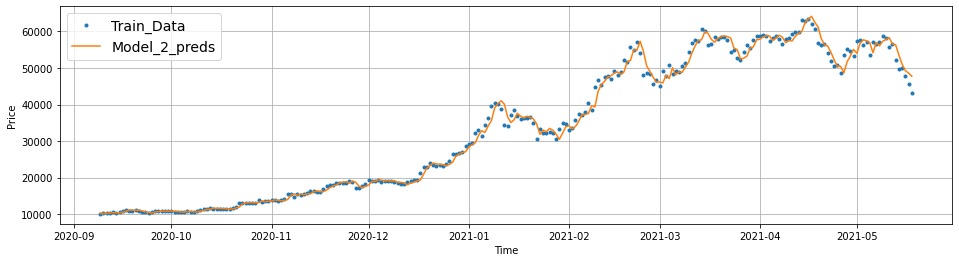

In [ ]:
offset = 300

plt.figure(figsize = (16,4))
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = test_labels[:, 0], start = offset, label = 'Train_Data')
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_2_preds, format = '-', start = offset, label = 'Model_2_preds')

In [ ]:
X_test[-len(test_windows):].shape

(552,)

# Model 3: Dense (window = 30, Horizon = 1)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices,window_size = WINDOW_SIZE, horizon = HORIZON)
full_windows.shape, full_labels.shape

((2751, 30), (2751, 7))

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2200, 30), (551, 30), (2200, 7), (551, 7))

In [ ]:
# del model_3

In [ ]:
# Build model 3

tf.random.set_seed(42)

# Create model architechture
model_3 = tf.keras.Sequential([
              layers.Dense(128, activation='relu'),
              layers.Dense(HORIZON)
], name = 'model_3_dense')

# compile model
model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

# Fit model
model_3.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_3.name)])

INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment

In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1322.7781


1322.778076171875

In [ ]:
model_3 = tf.keras.models.load_model('model_experiment/model_3_dense')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1228.1417


1228.1417236328125

In [ ]:
model_3_preds = model_3.predict(test_windows)
model_3_preds[:10]

array([[9233.328 , 9332.702 , 9363.651 , 9442.775 , 9401.978 , 9414.001 ,
        9280.01  ],
       [8911.084 , 9065.984 , 9113.08  , 9026.601 , 8990.093 , 9000.148 ,
        9053.433 ],
       [8848.506 , 9018.2295, 9006.146 , 8934.578 , 8929.888 , 8856.351 ,
        8958.367 ],
       [9048.449 , 9058.819 , 8966.749 , 9127.248 , 8982.123 , 9056.629 ,
        9002.575 ],
       [8958.309 , 9008.146 , 8827.891 , 8995.736 , 9129.433 , 9099.142 ,
        8881.021 ],
       [8938.739 , 9047.861 , 8900.939 , 9061.516 , 9056.251 , 9025.003 ,
        8891.686 ],
       [8828.712 , 9010.084 , 9000.729 , 8972.31  , 8803.657 , 8915.404 ,
        8829.373 ],
       [8609.195 , 8743.5   , 8797.99  , 8757.362 , 8679.227 , 8565.59  ,
        8584.797 ],
       [8559.883 , 8503.549 , 8611.439 , 8602.311 , 8536.914 , 8430.177 ,
        8403.197 ],
       [8630.615 , 8560.267 , 8493.44  , 8638.791 , 8423.05  , 8382.302 ,
        8407.878 ]], dtype=float32)

In [ ]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 1228.1416,
 'mape': 5.4698334,
 'mase': 35.57547,
 'mse': 5323686.5,
 'rmse': 2307.3115}

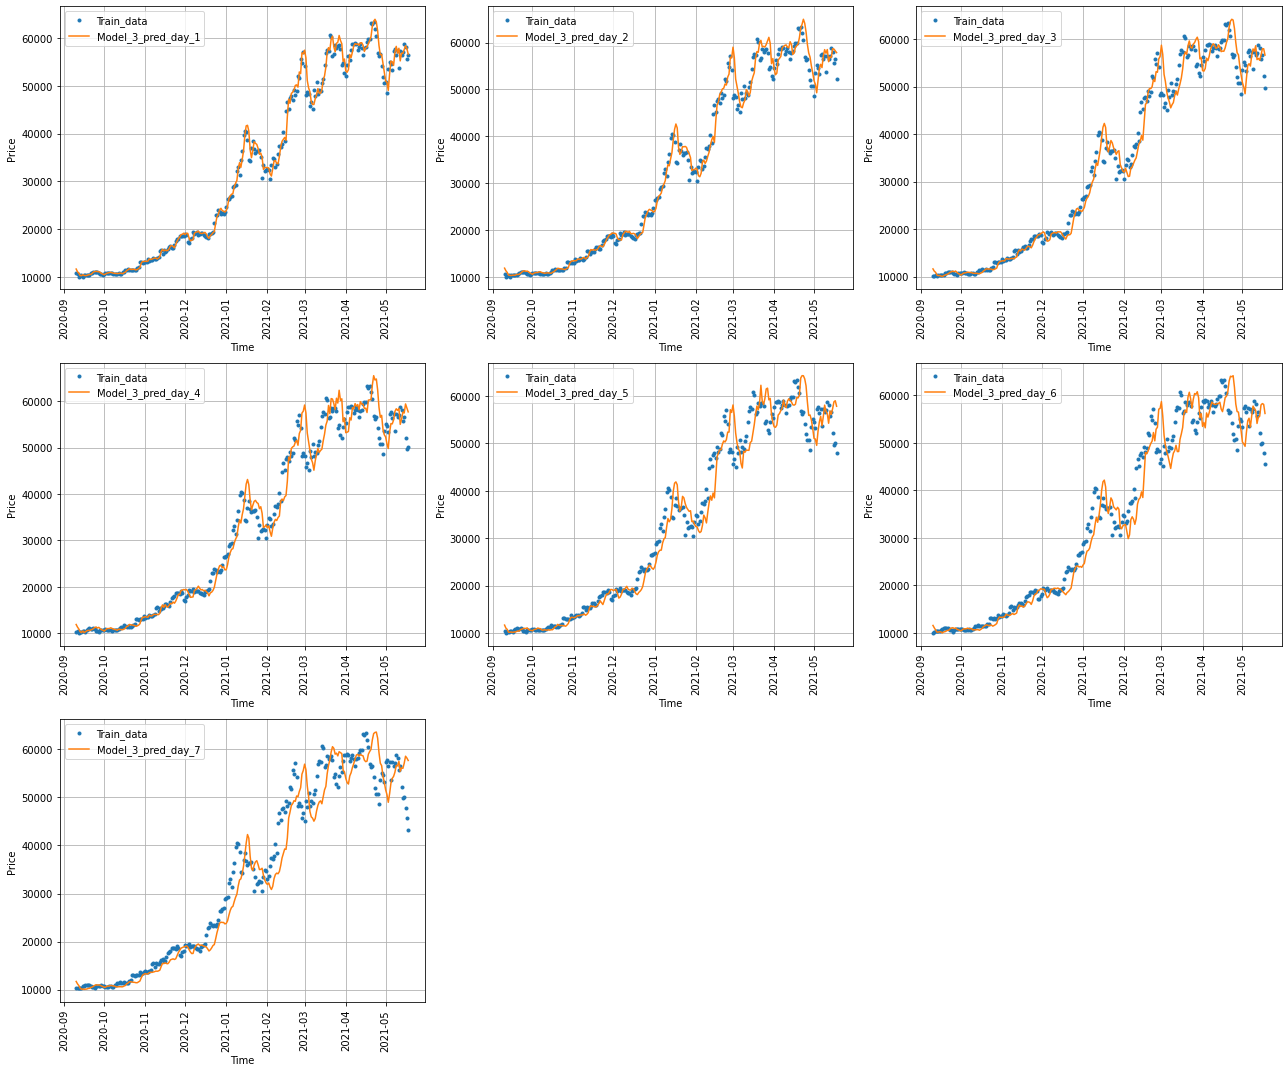

In [ ]:
plt.figure(figsize = [18,15])

for i in range(HORIZON):
  plt.subplot(3,3,i+1)
  plot_time_series(timesteps = X_test[-len(test_windows):],
                   values = test_labels[:, i],
                   start = offset,
                   label = 'Train_data')
  plot_time_series(timesteps = X_test[-len(test_windows):],
                   values = model_3_preds[:, i],
                   start = offset,
                   format = '-',
                   label = 'Model_3_pred_day_'+f'{i+1}')
  plt.xticks(rotation = 90)
  plt.legend(fontsize = 10)
  plt.tight_layout()

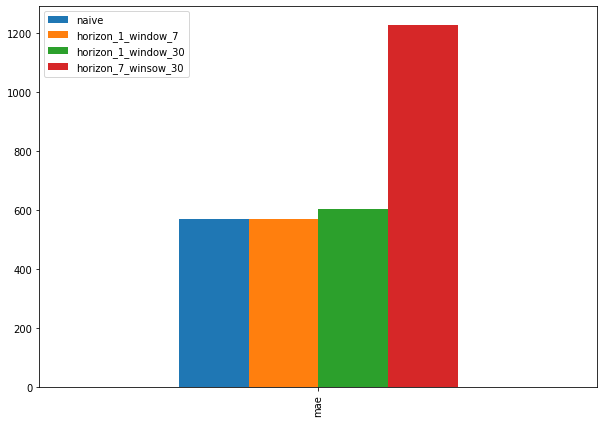

In [ ]:
pd.DataFrame({'naive': naive_results['mae'], 
              'horizon_1_window_7' : model_1_results['mae'],
              'horizon_1_window_30' : model_2_results['mae'],
              'horizon_7_winsow_30' : model_3_results['mae']}, index = ['mae']).plot(figsize = (10,7), kind = 'bar')

In [ ]:
# plt.subplot(221)

# # equivalent but more general
# ax1 = plt.subplot(2, 2, 1)

# # add a subplot with no frame
# ax2 = plt.subplot(222, frameon=False)

# # add a polar subplot
# plt.subplot(223, projection='polar')

# # add a red subplot that shares the x-axis with ax1
# plt.subplot(224, sharex=ax1, facecolor='red')

# # delete ax2 from the figure
# plt.delaxes(ax2)

# # add ax2 to the figure again
# plt.subplot(ax2)

# make the first axes "current" again
# plt.subplot(221)